# Text Analysis Challenge
| Name       | Student Number | Email Address            | Student Type         |
|------------|----------------|--------------------------|----------------------|
| YUPENG WEN | s224212855     | s224212855@deakin.edu.au | Postgraduate(Sit731) |

## Introduction
This article analyses public discussions from the AI Stack Exchange community to identify trends and opportunities in AI development and adoption. All data used in this study are sourced from Stack Exchange [1]. The analysis focuses on how AI-related discussions have evolved over time, identifying the most popular AI topics, and examining how engagement metrics vary across different subjects. Additionally, seasonal patterns in AI-related discussions are explored to uncover recurring trends and cycles.

Finally, the study extends the analysis to the Data Science Stack Exchange community. By comparing engagement trends and topic distributions between the two communities, this article aims to provide insights into potential investment opportunities in AI and data science.

## Analysis
In this section, we will import the AI-related CSV dataset and generate visualisations to identify key topic trends and patterns.

### 1 Foundational Data Analysis
#### 1.1 Importing the CSV files

In [1]:
import pandas as pd

# Load CSV files
ai_badges_df = pd.read_csv('data/stack_exchange_data/AI_Badges.csv')
ai_comments_df = pd.read_csv('data/stack_exchange_data/AI_Comments.csv')
ai_postHistory_df = pd.read_csv('data/stack_exchange_data/AI_PostHistory.csv')
ai_postLinks_df = pd.read_csv('data/stack_exchange_data/AI_PostLinks.csv')
ai_posts_df = pd.read_csv('data/stack_exchange_data/AI_Posts.csv')
ai_tags_df = pd.read_csv('data/stack_exchange_data/AI_Tags.csv')
ai_users_df = pd.read_csv('data/stack_exchange_data/AI_Users.csv')
ai_votes_df = pd.read_csv('data/stack_exchange_data/AI_Votes.csv')

#### 1.2 Description of Tables and Their Relationships
Based on the official Stack Exchange table descriptions [1], the following conclusions can be drawn regarding the dataset schema.

##### Badges(Id,UserId,Name,Date,Class,TagBased)
- Purpose: Records badges awarded to users for specific achievements or contributions within the community.
- Key relationships:
  - userId -> Users.Id

##### Comments(Id,PostId,Score,Text,CreationDate,UserId,UserDisplayName)
- Purpose: Contains comments made by users on posts.
- Key relationships:
  - PostId → Posts.Id
  - UserId → Users.Id

##### PostHistory(Id,PostHistoryTypeId,PostId,RevisionGUID,CreationDate,UserId,Text,ContentLicense,Comment,UserDisplayName)
- Purpose: Tracks the edit history and changes made to posts.
- Key relationships:
  - PostId → Posts.Id
  - UserId → Users.Id

##### PostLinks(Id,CreationDate,PostId,RelatedPostId,LinkTypeId)
- Purpose: Stores relationships between posts, such as duplicate questions or related topics.
- Key relationships:
  - PostId → Posts.Id
  - RelatedPostId → Posts.Id

##### Posts(Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,ContentLicense,ParentId,ClosedDate,FavoriteCount,CommunityOwnedDate,LastEditorDisplayName,OwnerDisplayName)
- Purpose: Core table containing all questions and answers posted on the platform.
- Key fields:
  - PostTypeId: Distinguishes questions and answers
  - ParentId: Links answers to their parent question
- Key relationships:
  - OwnerUserId → Users.Id
  - AcceptedAnswerId → Posts.Id

##### Tags(Id,TagName,Count,ExcerptPostId,WikiPostId)
- Purpose: Stores metadata about tags used to categorise questions.
- Key relationships:
  - Linked to Posts via the Tags field in the Posts table

##### Users(Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId)
- Purpose: Contains profile and activity information for registered users.
- Key relationships:
  - Referenced by Posts, Comments, Badges, Votes, and PostHistory

##### Votes(Id,PostId,VoteTypeId,CreationDate,UserId,BountyAmount)
- Purpose: Records voting actions (upvotes, downvotes, accepted answers, bounties).
- Key relationships:
  - PostId → Posts.Id
  - UserId → Users.Id

##### Summary
1. Users are central actors who create Posts, write Comments, receive Badges, and cast Votes.
2. Posts are the core content, linked to Tags, Comments, Votes, PostHistory, and PostLinks.
3. Tags categorise posts, enabling topic-based trend analysis.
4. PostHistory and PostLinks capture how knowledge evolves and connects over time.


### 2 Analysis: AI relevant Topic
#### 2.1 How has the volume of AI-related discussions changed over time?
In this section, we focus on question-type posts (PostTypeId = 1) to analyse trends over the years.

**Get the AI Stack Exchange Post Per Year**

In [2]:
ai_posts_df['CreationDate'] = pd.to_datetime(ai_posts_df['CreationDate'])
ai_posts_df.loc[:, 'Year'] = ai_posts_df['CreationDate'].dt.year

import matplotlib.pyplot as plt

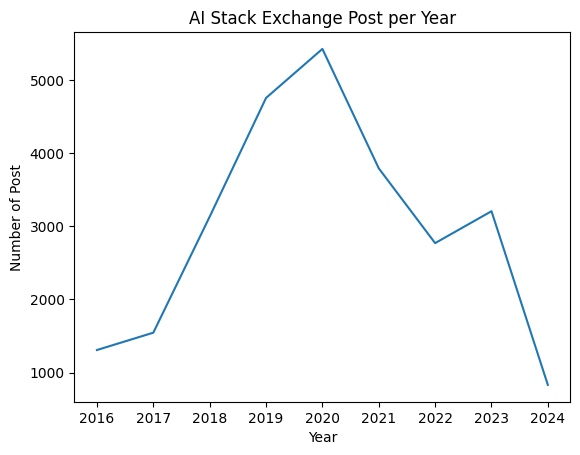

In [3]:
ai_all_posts_per_year = ai_posts_df.groupby('Year').size()

plt.figure()
ai_all_posts_per_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Post')
plt.title('AI Stack Exchange Post per Year')
plt.show()

**Get the AI Stack Exchange Questions Per Year**

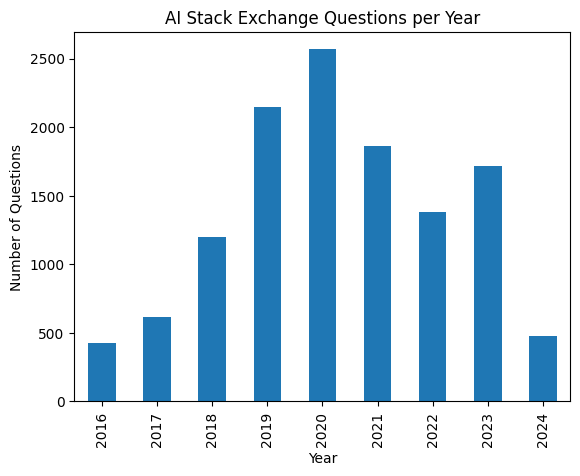

In [4]:
questions = ai_posts_df[ai_posts_df['PostTypeId'] == 1].copy()
posts_per_year = questions.groupby('Year').size()

plt.figure()
posts_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.title('AI Stack Exchange Questions per Year')
plt.show()

Conclusion: From the two figures above, it can be observed that the number of post increased steadily before 2020, but declined after 2020. The “Question” post type follows this same trend.

#### 2.2 Which AI topics (tags or keywords) are becoming more or less popular?
In this section, we will split the tags and explode the records to determine which AI topics are becoming more or less popular.

**Overview of the Top 10 Tags in AI**

In [5]:
top_10_tags = ai_tags_df[['TagName', 'Count']].sort_values(by='Count', ascending=False).head(10)
print(top_10_tags)

                           TagName  Count
5                  neural-networks   2604
83          reinforcement-learning   2471
15                machine-learning   2360
43                   deep-learning   2027
44   convolutional-neural-networks   1183
52     natural-language-processing    760
49                 computer-vision    537
276                        deep-rl    511
42                        training    491
53                  classification    488


**Overview of the Last 10 Tags in AI**

In [6]:
last_10_tags = ai_tags_df[['TagName', 'Count']].sort_values(by='Count', ascending=True).head(10)
print(last_10_tags)

                               TagName  Count
984                       accelerators      1
941                               umap      1
940                           theorems      1
942                       lunar-lander      1
524  physical-symbol-system-hypothesis      1
945          jensen-shannon-divergence      1
944                    conditional-gan      1
515               operant-conditioning      1
546            deterministic-annealing      1
498                    humanoid-robots      1


**Overview of the Top AI Tags Trends Over Time**

In [7]:
questions['TagList'] = questions['Tags'].str.split('|').apply(lambda x: [tag.strip() for tag in x if tag.strip()])

tags_exploded = questions.explode('TagList')

tag_trends = (
    tags_exploded
    .groupby(['Year', 'TagList'])
    .size()
    .reset_index(name='Count')
)

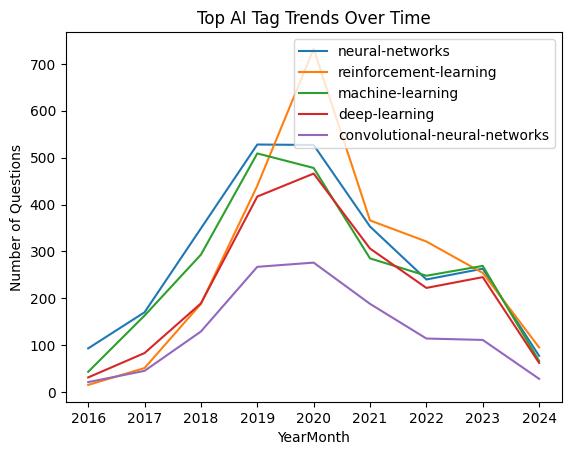

In [8]:
# Select top 5 most frequent tags overall
top_tags = (
    tags_exploded['TagList']
    .value_counts()
    .head(5)
    .index
)

plt.figure()

all_tag = {}

for tag in top_tags:
    tag_data = tag_trends[tag_trends['TagList'] == tag]
    plt.plot(tag_data['Year'], tag_data['Count'], label=tag)
    all_tag['AI_'+tag] = {
        'Year': tag_data['Year'],
        'Count': tag_data['Count'],
    }

plt.xlabel('YearMonth')
plt.ylabel('Number of Questions')
plt.title('Top AI Tag Trends Over Time')
plt.legend()
plt.show()

Conclusion: Based on the figures above, neural networks, reinforcement learning, machine learning, deep learning, and convolutional neural networks are the most prominent AI topic of internet. However, interest in these topic has declined since 2020.

To make better decisions, we need to find the most popular AI topics from the last three years

**Top 3 Topics per Year (Last 3 Years)**

In [9]:
# Get latest date in dataset
latest_date = ai_posts_df['CreationDate'].max()

# Filter last 3 years
recent_posts = ai_posts_df[
    ai_posts_df['CreationDate'] >= (latest_date - pd.DateOffset(years=2))
]

recent_questions = recent_posts[
    recent_posts['PostTypeId'] == 1
]

recent_questions = recent_questions.copy()

recent_questions['TagList'] = recent_questions['Tags'].str.split('|').apply(lambda x: [tag.strip() for tag in x if tag.strip()])
exploded_tags = recent_questions.explode('TagList')

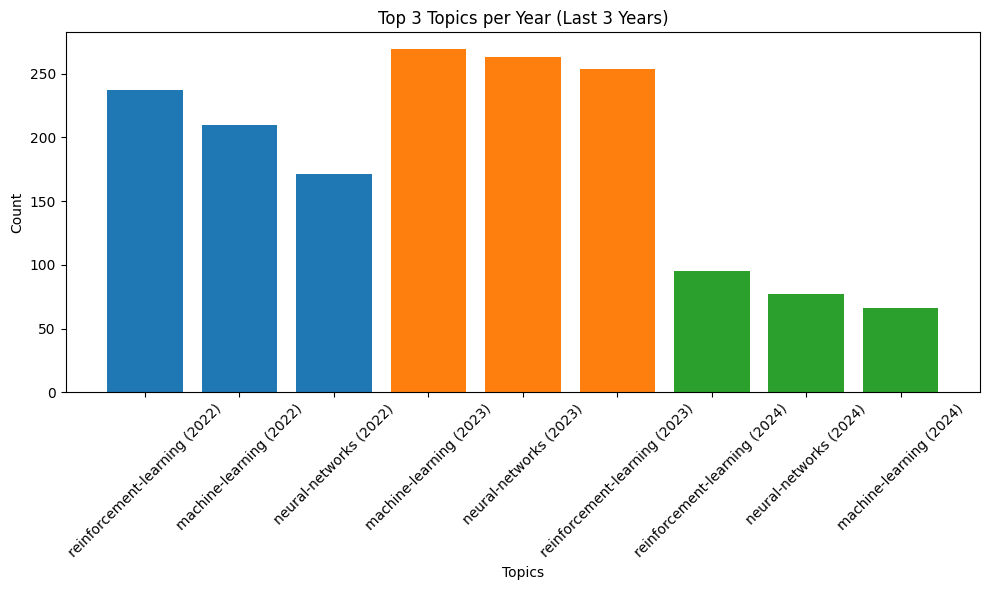

In [10]:
top_3_per_year = (
    exploded_tags
    .groupby(['Year', 'TagList'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Year', 'Count'], ascending=[True, False])
    .groupby('Year')
    .head(3)
)

fig, ax = plt.subplots(figsize=(10, 6))

for year in top_3_per_year['Year'].unique():
    year_data = top_3_per_year[top_3_per_year['Year'] == year]
    ax.bar(year_data['TagList'] + f" ({year})", year_data['Count'])

ax.set_title("Top 3 Topics per Year (Last 3 Years)")
ax.set_xlabel("Topics")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.3 How do engagement metrics vary across topics
In this section, we will examine the engagement metrics across different topics.

**Average Views by AI Topic (Top 10 Tags)**

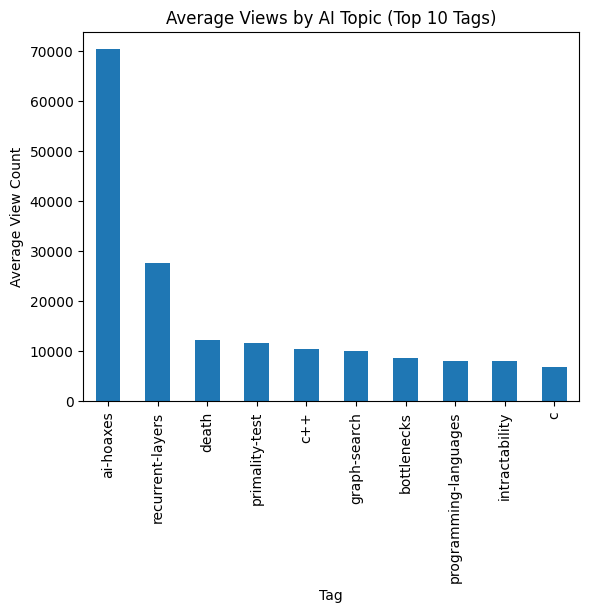

In [11]:
engagement_view = (
    tags_exploded
    .groupby('TagList')
    .agg({
        'ViewCount': 'mean'
    })
    .sort_values(by='ViewCount', ascending=False)
)

top_engagement = engagement_view.head(10)

plt.figure()
top_engagement['ViewCount'].plot(kind='bar')
plt.xlabel('Tag')
plt.ylabel('Average View Count')
plt.title('Average Views by AI Topic (Top 10 Tags)')
plt.show()

**Average Answer by AI Topic (Top 10 Tags)**

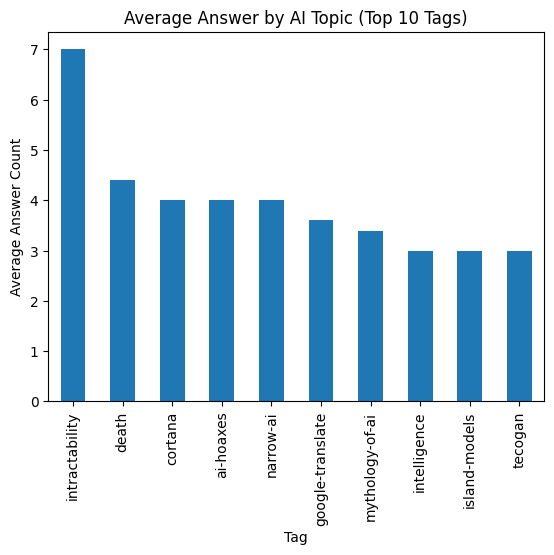

In [12]:
engagement_answer = (
    tags_exploded
    .groupby('TagList')
    .agg({
        'AnswerCount': 'mean'
    })
    .sort_values(by='AnswerCount', ascending=False)
)

plt.figure()
engagement_answer.head(10)['AnswerCount'].plot(kind='bar')
plt.xlabel('Tag')
plt.ylabel('Average Answer Count')
plt.title('Average Answer by AI Topic (Top 10 Tags)')
plt.show()

**Average Score by AI Topic (Top 10 Tags)**

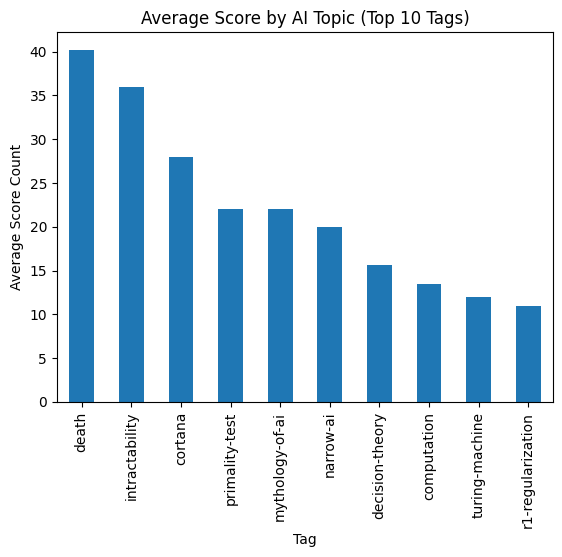

In [13]:
engagement_view = (
    tags_exploded
    .groupby('TagList')
    .agg({
        'Score': 'mean'
    })
    .sort_values(by='Score', ascending=False)
)

plt.figure()
engagement_view.head(10)['Score'].plot(kind='bar')
plt.xlabel('Tag')
plt.ylabel('Average Score Count')
plt.title('Average Score by AI Topic (Top 10 Tags)')
plt.show()

Conclusion: The figures show clear differences in engagement across topics: AI-hoaxes leads in views, intractability in answers, and death in scores.

#### 2.4 Are there seasonal or event driven patterns in AI related discussions?
In this part, we will explore seasonal patterns in AI discussions by aggregating posts by month across all years.

**Monthly Activity**

In [14]:
questions['Month'] = questions['CreationDate'].dt.month
monthly_activity = questions.groupby('Month').size()

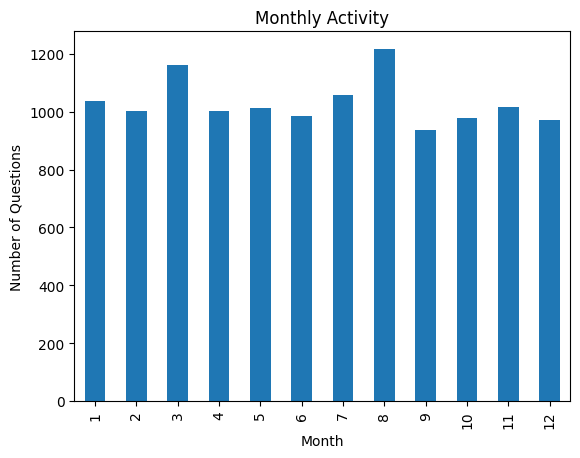

In [15]:
plt.figure()
monthly_activity.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.title('Monthly Activity')
plt.show()

Conclusion: Based on the figure, the number of questions stay roughly around 1000, suggesting no obvious seasonal pattern in AI-related discussion.

### Summary of Key Findings and Investment Implications
From Figure 2.1, we can see that the number of AI-related discussions has been decreasing since 2020. This trend suggests a potential risk for investment in artificial intelligence. However, there is no doubt that AI remains a key technology for the future, so continued investment is still necessary.

In Section 2.2, the most popular AI topic is identified as neural networks. Reinforcement learning, machine learning, and deep learning are also similarly popular, while convolutional neural networks are less popular than the other topics. Additionally, in the last two years, neural networks, machine learning, and reinforcement learning have consistently been the most discussed AI topics. In 2024, reinforcement learning surpassed neural networks in popularity, indicating that reinforcement learning may be a stronger focus for 2025.

In Sections 2.3 and 2.4, we observe that AI-related discussions do not show any clear seasonal pattern.


### A Comparative study between the AI Stack Exchange and Data Science Stack Exchange communities
In this section, we compare the AI Stack Exchange and Data Science Stack Exchange communities by analysing engagement trends, topic distributions, and community focus. The objective is to identify meaningful insights into AI development and its practical adoption.

**AI/DS Stack Exchange Post Per Year**

In [16]:
# Load CSV files
ds_badges_df = pd.read_csv('data/stack_exchange_data/DS_Badges.csv')
ds_comments_df = pd.read_csv('data/stack_exchange_data/DS_Comments.csv')
ds_postHistory_df = pd.read_csv('data/stack_exchange_data/DS_PostHistory.csv')
ds_postLinks_df = pd.read_csv('data/stack_exchange_data/DS_PostLinks.csv')
ds_posts_df = pd.read_csv('data/stack_exchange_data/DS_Posts.csv')
ds_tags_df = pd.read_csv('data/stack_exchange_data/DS_Tags.csv')
ds_users_df = pd.read_csv('data/stack_exchange_data/DS_Users.csv')
ds_votes_df = pd.read_csv('data/stack_exchange_data/DS_Votes.csv')

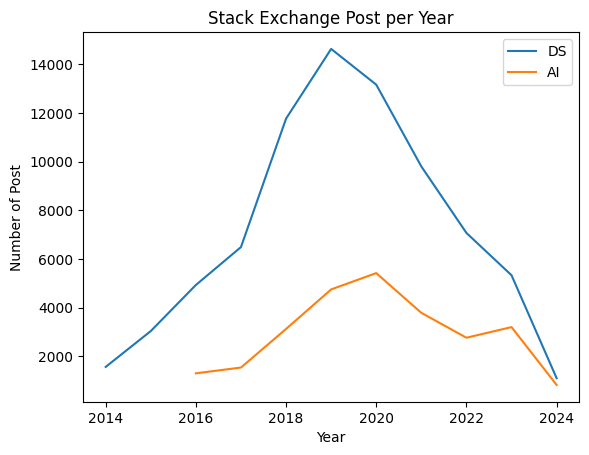

In [17]:
ds_posts_df['CreationDate'] = pd.to_datetime(ds_posts_df['CreationDate'])
ds_posts_df.loc[:, 'Year'] = ds_posts_df['CreationDate'].dt.year

ds_all_posts_per_year = ds_posts_df.groupby('Year').size()

plt.figure()
ds_all_posts_per_year.plot(kind='line',label='DS')
ai_all_posts_per_year.plot(kind='line',label='AI')
plt.xlabel('Year')
plt.ylabel('Number of Post')
plt.title('Stack Exchange Post per Year')

plt.legend()
plt.show()

In [18]:
top_10_tags = ds_tags_df[['TagName', 'Count']].sort_values(by='Count', ascending=False).head(10)
print(top_10_tags)

              TagName  Count
1    machine-learning  11403
31             python   6693
104     deep-learning   4871
55     neural-network   4368
52     classification   3281
32                nlp   2740
184             keras   2722
79       scikit-learn   2308
181        tensorflow   2183
48        time-series   1885


In [19]:
last_10_tags = ds_tags_df[['TagName', 'Count']].sort_values(by='Count', ascending=True).head(10)
print(last_10_tags)

                 TagName  Count
701    transformer-model      1
699  residual-connection      1
698               f-test      1
697         mann-whitney      1
695            streamlit      1
696            sign-test      1
660              speaker      1
328           ibm-watson      1
689               vscode      1
687       power-function      1


**Top DS Tag Trends Over Time**

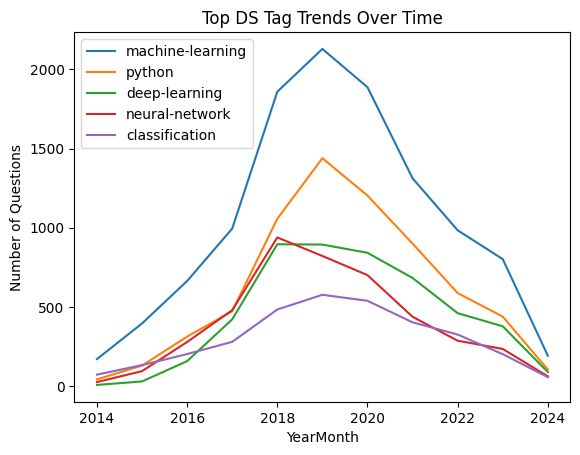

In [20]:
ds_questions_df = ds_posts_df[ds_posts_df['PostTypeId'] == 1].copy()

ds_questions_df['TagList'] = ds_questions_df['Tags'].str.split('|').apply(lambda x: [tag.strip() for tag in x if tag.strip()])

ds_tags_exploded = ds_questions_df.explode('TagList')

ds_tag_trends = (
    ds_tags_exploded
    .groupby(['Year', 'TagList'])
    .size()
    .reset_index(name='Count')
)

# Select top 5 most frequent tags overall
ds_top_tags = (
    ds_tags_exploded['TagList']
    .value_counts()
    .head(5)
    .index
)

plt.figure()

for tag in ds_top_tags:
    tag_data = ds_tag_trends[ds_tag_trends['TagList'] == tag]
    plt.plot(tag_data['Year'], tag_data['Count'], label=tag)
    all_tag['DS_'+tag] = {
        'Year': tag_data['Year'],
        'Count': tag_data['Count'],
    }

plt.xlabel('YearMonth')
plt.ylabel('Number of Questions')
plt.title('Top DS Tag Trends Over Time')
plt.legend()
plt.show()

**Top AI/DS Tag Trends Over Time**

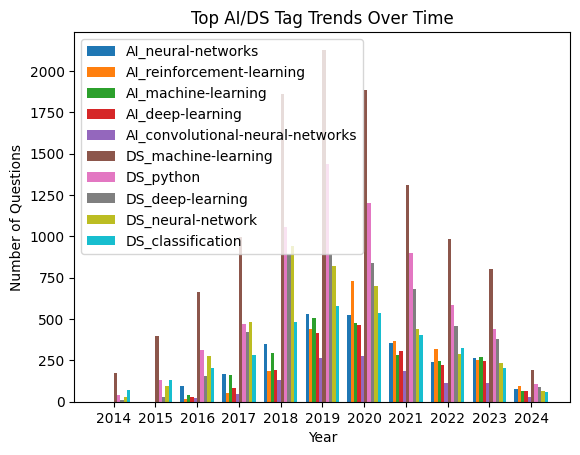

In [21]:
import numpy as np

plt.figure()

tags = list(all_tag.keys())

# Collect all unique years
years = sorted(
    set().union(*[set(all_tag[tag]['Year']) for tag in tags])
)

bar_width = 0.8 / len(tags)
x = np.arange(len(years))

for i, tag in enumerate(tags):
    tag_dict = all_tag[tag]

    # Convert to DataFrame
    df = pd.DataFrame({
        'Year': tag_dict['Year'],
        'Count': tag_dict['Count']
    })

    # Align counts with years
    counts = (
        df.set_index('Year')
          .reindex(years, fill_value=0)['Count']
    )

    plt.bar(
        x + i * bar_width,
        counts,
        width=bar_width,
        label=f"{tag}"
    )

plt.xticks(x + bar_width * (len(tags) - 1) / 2, years)
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.title('Top AI/DS Tag Trends Over Time')
plt.legend()
plt.show()

Conclusion: Based on the year-by-year analysis of Stack Exchange activity, the Data Science (DS) community demonstrates a faster growth rate in discussion activity compared to the Artificial Intelligence (AI) community. A comparison of top tag trends further reinforces this observation. Within the DS community, the annual number of questions increases from approximately 200 to nearly 2,000, whereas the AI community exhibits more moderate growth, rising from around 100 to approximately 700 questions per year.

An examination of topic focus reveals distinct differences between the two communities. The most frequent tags in the AI community include neural-networks, reinforcement-learning, machine-learning, deep-learning, and convolutional-neural-networks. In contrast, the DS community’s top tags are machine-learning, python, deep-learning, neural-network, and classification. These patterns suggest that DS discussions are broader and more application-oriented, while AI discussions tend to concentrate on foundational algorithms and model-centric research.

Furthermore, the comparison of AI and DS tag trends over time shows that DS-related topics such as machine-learning, python, and deep-learning consistently attract higher levels of engagement than AI-focused topics such as neural-networks and reinforcement-learning. This indicates that Data Science currently receives greater practical attention within the community. Additionally, the observed decline in discussion activity around foundational AI research topics suggests a shift away from purely theoretical development toward applied machine learning solutions. As a result, these findings imply that companies may benefit from prioritising investment in practical machine learning applications rather than focusing exclusively on foundational AI research.

## Reference
[1] Meta Stack Exchange. (n.d.). Database schema documentation for the public data dump and SEDE. [online] Available at: https://meta.stackexchange.com/questions/2677/database-schema-documentation-for-the-public-data-dump-and-sede.